In [1]:
from PIL import Image
import requests
from io import BytesIO
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

max_dimension = 254

# Load the image from the provided URL
url = "https://assets-global.website-files.com/64efa7aec33b3cad9bbe5b6b/64fa48ed321bc75b845d3480_Neo%20Noir%2026.webp"
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img = img.convert('RGB')

# Resize the image to reduce computation time while maintaining proportions
original_width, original_height = img.size
scaling_factor = max_dimension / max(original_width, original_height)
new_size = (int(original_width * scaling_factor), int(original_height * scaling_factor))
img = img.resize(new_size, Image.ANTIALIAS)

# Convert the image data to a two-dimensional numpy array
image_data = np.array(img)
image_data = image_data.reshape((-1, 3))  # Reshape to (num_pixels, 3)

# Use KMeans to find the top 6 colors
num_colors = 6
kmeans = KMeans(n_clusters=num_colors)
kmeans.fit(image_data)

# Get the cluster centers (top 6 colors)
top_colors = kmeans.cluster_centers_

# Print the top colors as RGB values
print(f"Top colors for {url}:")
for i, color in enumerate(top_colors):
    print(f"Color {i + 1}: {color.astype(int)}")


Top colors for https://assets-global.website-files.com/64efa7aec33b3cad9bbe5b6b/64fa48ed321bc75b845d3480_Neo%20Noir%2026.webp:
Color 1: [91 45 26]
Color 2: [ 15  82 101]
Color 3: [18 24 26]
Color 4: [212 186 124]
Color 5: [ 39 133 152]
Color 6: [166  97  41]


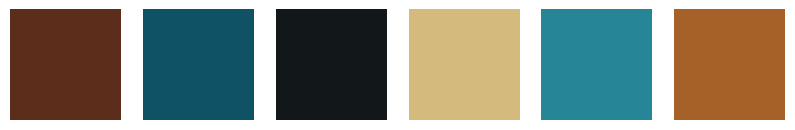

In [2]:
def plot_colors(frequent_colors):
    plt.figure(figsize=(10, 2))
    for i, color in enumerate(frequent_colors):
        plt.subplot(1, 6, i+1)
        plt.axis('off')
        plt.imshow([[color.astype(np.uint8)]])
    plt.show()

plot_colors(top_colors)